# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Malte Kramp

Datum: 20.11.2023

Gruppe: 09

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


In [ ]:
Warmes wasser wird in einem Weinglas stehengelassen während es abkühlt.

<img src="figures/Newton.JPG" width="800">

## Versuchsauswertung

In [8]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [9]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
datapath = 'data/newton/newton.h5'

# DONE #

In [10]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
    
import h5py as h5

with h5.File(datapath) as f:
    #die datasets werden aus der hdf5 Datei ausgelesen...
    time1 = f["RawData/1ee86df3-2fdd-6c45-9f5d-3d0fe20ac536/timestamp"]
    temp1 = f["RawData/1ee86df3-2fdd-6c45-9f5d-3d0fe20ac536/temperature"]
    time2 = f["RawData/1ee86df2-76e8-67c7-94aa-05d73d83f205/timestamp"]
    temp2 = f["RawData/1ee86df2-76e8-67c7-94aa-05d73d83f205/temperature"]
    #...und zum leichtere Umgang als numpy arrays gespeichert
    time_1=np.array(time1)
    temp_1=np.array(temp1)
    time_2=np.array(time2)
    temp_2=np.array(temp2)
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

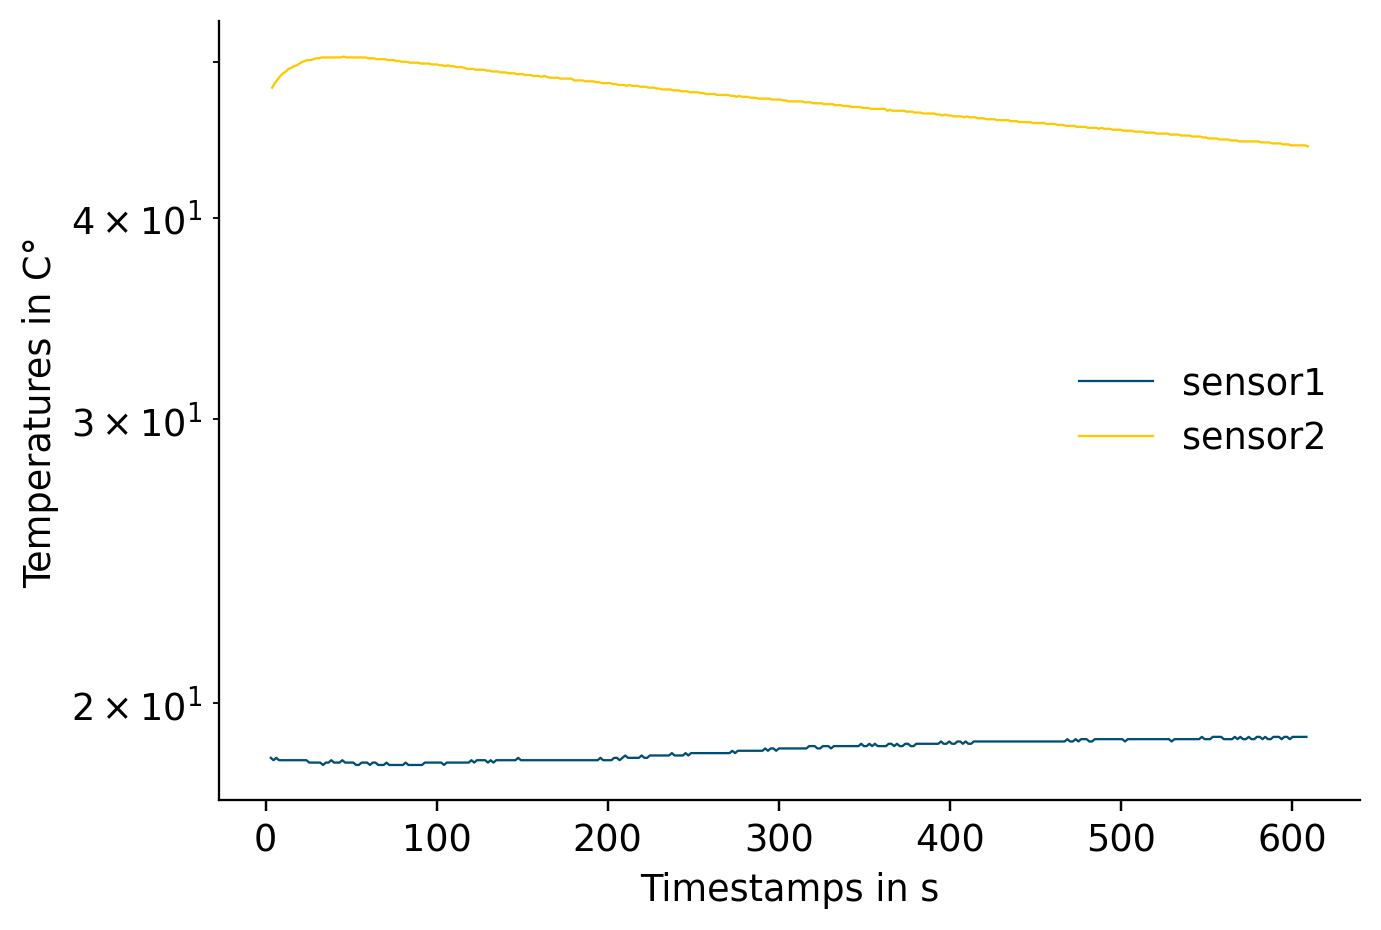

In [11]:
# TODO: Use the temperature and time data for plotting
#erstellen der plots
plt.plot(time_1, temp_1, label = 'sensor1')
plt.plot(time_2, temp_2, label = 'sensor2')
#achsen beschriften
plt.yscale('log')
plt.xlabel('Timestamps in s')
plt.ylabel('Temperatures in C°')
plt.legend() 
plt.show()
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [29]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
num_points = 10
#richtige Werte auslesen
t = np.linspace(0, 20,num_points)
T2 = temp_2[377]
T1 = temp_2[30]
Tt = np.linspace(temp_1[0], temp_1[377], num_points)

#zusammensetzen der Formel und ausrechnen von K
T1_m_T2 = T1 - T2
log_Tt_m_T2 = np.full_like(t, np.log(Tt_m_T2))
Ks = np.polyfit(t, log_Tt_m_T2, 1)
K = Ks[0]

# DONE #

6.0


#### (iV) Ergebnis

In [30]:
# TODO: Print result

print(K)

# DONE #

4.1417418866325126e-17


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Ergebnis scheint sehr genau und wirkt realistisch.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die Automatische Durchführung durch die im Hintergrund laufenden Skripte haben den Versuch sehr einfach durchzuführen gemacht. Dies wäre grade dann von Vorteil, wenn ein Versuch mehrmals wiederholt werden müsste.